# Flujos de agua azul y verde_Cuenca Cachi

In [90]:
import pandas as pd
import geopandas as gpd  # pip install: Shapely, Rtree, GDAL, Fiona, Pyproj; Formato Weels(https://www.lfd.uci.edu/~gohlke/pythonlibs/#cftime)
import PIL# pip install Pillow
import io
import matplotlib.pyplot as plt
# Leer archivos datos de .csv
data = pd.read_csv('D:/Qswat_cachi/Jonatan_tesis/Scenarios/Simulacion_Python/GWF_BWF_2090.csv', index_col="Sub_Cuencas")

In [2]:
data

,Pais,Lat,Long,PRECIP,ET,V9,SURQ,GW,WYLD,LAT,SW,BWF,GWF,GWC
Sub_Cuencas,,,,,,,,,,,,,,
San Pedro de Cachi,Peru/Ayacucho,NaN,NaN,976.457,536.076,46.089,55.200,251.198,411.054,90.051,280.531,396.449,816.607,0.673182
Vinchos,Peru/Ayacucho,NaN,NaN,579.578,469.687,54.622,5.532,51.355,84.862,24.038,336.873,80.925,806.560,0.908815
Pongora,Peru/Ayacucho,NaN,NaN,675.339,430.875,48.335,40.045,113.883,220.003,58.947,307.485,212.875,738.360,0.776212
Yucaes,Peru/Ayacucho,NaN,NaN,1039.039,548.879,50.559,84.656,229.626,463.411,135.842,376.342,450.124,925.221,0.672719
Paccha,Peru/Ayacucho,NaN,NaN,579.578,486.510,79.071,8.647,28.843,68.472,28.249,531.681,65.739,1018.191,0.939351
Huatatas,Peru/Ayacucho,NaN,NaN,1039.039,552.940,49.705,74.829,333.221,491.471,64.631,353.524,472.681,906.464,0.657265
Chillico,Peru/Ayacucho,NaN,NaN,579.578,463.171,46.669,5.453,57.122,91.586,24.783,251.447,87.358,714.618,0.891072
Chicllarazo(Aguas arriba),Peru/Ayacucho,NaN,NaN,677.943,447.969,73.781,12.626,135.249,203.162,46.979,465.375,194.854,913.344,0.824170
Apacheta,Peru/Ayacucho,NaN,NaN,701.874,534.344,86.552,14.628,68.491,144.860,57.060,437.673,140.179,972.017,0.873962


In [20]:
dat = data.drop(['V9', 'BWF', 'GWF', 'GWC'], axis=1)
dat

,Pais,Lat,Long,PRECIP,ET,SURQ,GW,WYLD,LAT,SW
Sub_Cuencas,,,,,,,,,,
San Pedro de Cachi,Peru/Ayacucho,NaN,NaN,976.457,536.076,55.200,251.198,411.054,90.051,280.531
Vinchos,Peru/Ayacucho,NaN,NaN,579.578,469.687,5.532,51.355,84.862,24.038,336.873
Pongora,Peru/Ayacucho,NaN,NaN,675.339,430.875,40.045,113.883,220.003,58.947,307.485
Yucaes,Peru/Ayacucho,NaN,NaN,1039.039,548.879,84.656,229.626,463.411,135.842,376.342
Paccha,Peru/Ayacucho,NaN,NaN,579.578,486.510,8.647,28.843,68.472,28.249,531.681
Huatatas,Peru/Ayacucho,NaN,NaN,1039.039,552.940,74.829,333.221,491.471,64.631,353.524
Chillico,Peru/Ayacucho,NaN,NaN,579.578,463.171,5.453,57.122,91.586,24.783,251.447
Chicllarazo(Aguas arriba),Peru/Ayacucho,NaN,NaN,677.943,447.969,12.626,135.249,203.162,46.979,465.375
Apacheta,Peru/Ayacucho,NaN,NaN,701.874,534.344,14.628,68.491,144.860,57.060,437.673


In [30]:
dat1 = dat.eval('BWF = SURQ + GW + LAT')
dat2 = dat1.eval('GWF = ET + SW')
dat3 = dat2.eval('GWC = GWF/(GWF+BWF)')
dat3

,Pais,Lat,Long,PRECIP,ET,SURQ,GW,WYLD,LAT,SW,BWF,GWF,GWC
Sub_Cuencas,,,,,,,,,,,,,
San Pedro de Cachi,Peru/Ayacucho,NaN,NaN,976.457,536.076,55.200,251.198,411.054,90.051,280.531,396.449,816.607,0.673182
Vinchos,Peru/Ayacucho,NaN,NaN,579.578,469.687,5.532,51.355,84.862,24.038,336.873,80.925,806.560,0.908815
Pongora,Peru/Ayacucho,NaN,NaN,675.339,430.875,40.045,113.883,220.003,58.947,307.485,212.875,738.360,0.776212
Yucaes,Peru/Ayacucho,NaN,NaN,1039.039,548.879,84.656,229.626,463.411,135.842,376.342,450.124,925.221,0.672719
Paccha,Peru/Ayacucho,NaN,NaN,579.578,486.510,8.647,28.843,68.472,28.249,531.681,65.739,1018.191,0.939351
Huatatas,Peru/Ayacucho,NaN,NaN,1039.039,552.940,74.829,333.221,491.471,64.631,353.524,472.681,906.464,0.657265
Chillico,Peru/Ayacucho,NaN,NaN,579.578,463.171,5.453,57.122,91.586,24.783,251.447,87.358,714.618,0.891072
Chicllarazo(Aguas arriba),Peru/Ayacucho,NaN,NaN,677.943,447.969,12.626,135.249,203.162,46.979,465.375,194.854,913.344,0.824170
Apacheta,Peru/Ayacucho,NaN,NaN,701.874,534.344,14.628,68.491,144.860,57.060,437.673,140.179,972.017,0.873962


In [38]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Times New Roman']},size=10)# 'Computer Modern'
rc('text', usetex=False)
# Agrupar los datos por Cuencas
#data = data.groupby('chillico').sum()

In [42]:
# Eliminar las columnas lat y lon
data = dat3.drop(columns = ['Lat', 'Long', 'Pais'])
data

,PRECIP,ET,SURQ,GW,WYLD,LAT,SW,BWF,GWF,GWC
Sub_Cuencas,,,,,,,,,,
San Pedro de Cachi,976.457,536.076,55.200,251.198,411.054,90.051,280.531,396.449,816.607,0.673182
Vinchos,579.578,469.687,5.532,51.355,84.862,24.038,336.873,80.925,806.560,0.908815
Pongora,675.339,430.875,40.045,113.883,220.003,58.947,307.485,212.875,738.360,0.776212
Yucaes,1039.039,548.879,84.656,229.626,463.411,135.842,376.342,450.124,925.221,0.672719
Paccha,579.578,486.510,8.647,28.843,68.472,28.249,531.681,65.739,1018.191,0.939351
Huatatas,1039.039,552.940,74.829,333.221,491.471,64.631,353.524,472.681,906.464,0.657265
Chillico,579.578,463.171,5.453,57.122,91.586,24.783,251.447,87.358,714.618,0.891072
Chicllarazo(Aguas arriba),677.943,447.969,12.626,135.249,203.162,46.979,465.375,194.854,913.344,0.824170
Apacheta,701.874,534.344,14.628,68.491,144.860,57.060,437.673,140.179,972.017,0.873962


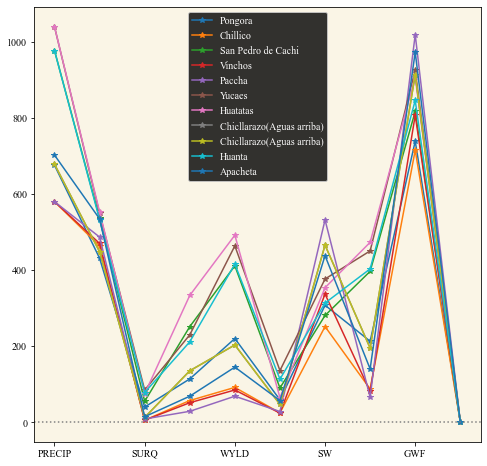

In [44]:
#Crear una transposicion de marco de datos
data_transposed  = data.T
data_transposed.plot(y = ['Pongora', 'Chillico', 'San Pedro de Cachi', 'Vinchos', 'Paccha', 'Yucaes', 'Huatatas', 
                          'Chicllarazo(Aguas arriba)', 'Chicllarazo(Aguas arriba)','Huanta','Apacheta'], 
                     use_index = True, figsize = (8,8), marker = '*')
plt.axhline(y=0, c='gray', ls=':')
leg = plt.legend(facecolor='black', framealpha=0.8)
for text in leg.get_texts():
    plt.setp(text, color = 'w')    
ax = plt.figure    
ax = plt.gca()
ax.set_facecolor('#faf5e6')
#plt.axvline(x=2089/3, c='gray', ls='--')
#plt.axvline(x=1989, c='gray', ls='--')

In [46]:
# Leer el vector del mapa cachi
cachi = gpd.read_file("D:/Clase R en Hdrología/Nueva carpeta/Cuenca_Cachi.geojson")
cachi

,Name,geometry
0,Pongora,"MULTIPOLYGON (((-74.11678 -12.96182, -74.11172..."
1,San Pedro de Cachi,"MULTIPOLYGON (((-74.36880 -12.97826, -74.36290..."
2,Chillico,"MULTIPOLYGON (((-74.27494 -13.07227, -74.27410..."
3,Paccha,"MULTIPOLYGON (((-74.40295 -13.15197, -74.40211..."
4,Vinchos,"MULTIPOLYGON (((-74.39027 -13.16269, -74.38943..."
5,Huatatas,"MULTIPOLYGON (((-74.19808 -13.10760, -74.19639..."
6,Apacheta,"MULTIPOLYGON (((-74.65675 -13.26985, -74.65168..."
7,Yuca,"MULTIPOLYGON (((-74.07872 -12.99475, -74.07535..."
8,Chicllarazo(Aguas arriba),"MULTIPOLYGON (((-74.54262 -13.36310, -74.54008..."
9,Huanta,"MULTIPOLYGON (((-74.20743 -12.81824, -74.20490..."


In [51]:
arroyos = gpd.read_file("D:/Qswat_cachi/Jonatan_tesis/Watershed/Shapes/riv1.shp")
arroyos

,Subbasin,SubbasinR,AreaC,Len2,Slo2,Wid2,Dep2,MinEl,MaxEl,Shape_Len,HydroID,OutletID,geometry
0,1,10,180575.0,36405.6,1.612389,116.033838,2.609797,2413.0,3000.0,36405.6,200001,100001,"LINESTRING (578650.810 8554805.399, 578559.369..."
1,2,1,125394.0,24629.7,1.108418,93.229884,2.255556,3000.0,3269.0,24629.7,200002,100002,"LINESTRING (565483.291 8544198.231, 565483.291..."
2,3,10,126907.0,11160.7,0.672001,93.903401,2.266406,2412.0,2481.0,11160.7,200003,100003,"LINESTRING (578742.251 8554896.840, 578833.692..."
3,4,3,74275.0,41801.8,1.940108,68.091869,1.829281,2481.0,3293.0,41801.8,200004,100004,"LINESTRING (587063.391 8550873.432, 587154.832..."
4,5,1,24150.0,23233.2,4.678650,34.700507,1.167098,3000.0,4079.0,23233.2,200005,100005,"LINESTRING (565483.291 8544198.231, 565391.850..."
5,6,3,36594.0,16225.2,2.668688,44.528249,1.378184,2481.0,2850.0,16225.2,200006,100006,"LINESTRING (587063.391 8550873.432, 587063.391..."
6,7,10,12040.0,5162.4,3.196188,22.853823,0.883465,2413.0,2576.0,5162.4,200007,100007,"LINESTRING (578650.810 8554805.399, 578650.810..."
7,8,11,40121.0,20827.0,2.482355,47.055663,1.429853,3354.0,3873.0,20827.0,200008,100008,"LINESTRING (568775.171 8520332.103, 568683.730..."
8,9,2,39891.0,44730.6,2.112648,46.893666,1.426570,3269.0,4218.0,44730.6,200009,100009,"LINESTRING (570238.228 8527281.627, 570238.228..."
9,10,0,360033.0,28969.1,0.762882,175.547560,3.439379,2205.0,2413.0,28969.1,200010,100010,"MULTILINESTRING ((573347.226 8573733.708, 5733..."


In [53]:
arroyos_cg = arroyos.to_crs(epsg=4326)
arroyos_cg

,Subbasin,SubbasinR,AreaC,Len2,Slo2,Wid2,Dep2,MinEl,MaxEl,Shape_Len,HydroID,OutletID,geometry
0,1,10,180575.0,36405.6,1.612389,116.033838,2.609797,2413.0,3000.0,36405.6,200001,100001,"LINESTRING (-74.27452 -13.07186, -74.27536 -13..."
1,2,1,125394.0,24629.7,1.108418,93.229884,2.255556,3000.0,3269.0,24629.7,200002,100002,"LINESTRING (-74.39574 -13.16808, -74.39574 -13..."
2,3,10,126907.0,11160.7,0.672001,93.903401,2.266406,2412.0,2481.0,11160.7,200003,100003,"LINESTRING (-74.27368 -13.07103, -74.27284 -13..."
3,4,3,74275.0,41801.8,1.940108,68.091869,1.829281,2481.0,3293.0,41801.8,200004,100004,"LINESTRING (-74.19682 -13.10718, -74.19597 -13..."
4,5,1,24150.0,23233.2,4.678650,34.700507,1.167098,3000.0,4079.0,23233.2,200005,100005,"LINESTRING (-74.39574 -13.16808, -74.39658 -13..."
5,6,3,36594.0,16225.2,2.668688,44.528249,1.378184,2481.0,2850.0,16225.2,200006,100006,"LINESTRING (-74.19682 -13.10718, -74.19681 -13..."
6,7,10,12040.0,5162.4,3.196188,22.853823,0.883465,2413.0,2576.0,5162.4,200007,100007,"LINESTRING (-74.27452 -13.07186, -74.27452 -13..."
7,8,11,40121.0,20827.0,2.482355,47.055663,1.429853,3354.0,3873.0,20827.0,200008,100008,"LINESTRING (-74.36481 -13.38380, -74.36565 -13..."
8,9,2,39891.0,44730.6,2.112648,46.893666,1.426570,3269.0,4218.0,44730.6,200009,100009,"LINESTRING (-74.35146 -13.32093, -74.35146 -13..."
9,10,0,360033.0,28969.1,0.762882,175.547560,3.439379,2205.0,2413.0,28969.1,200010,100010,"MULTILINESTRING ((-74.32390 -12.90084, -74.323..."


<AxesSubplot:>

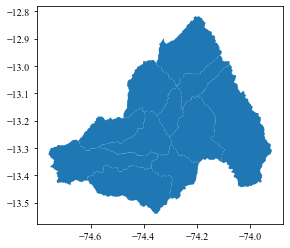

In [55]:
cachi.plot()

<AxesSubplot:>

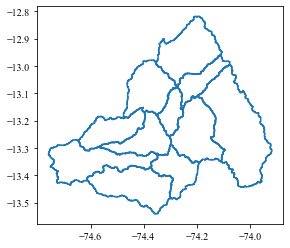

In [56]:
cachi.boundary.plot()

<AxesSubplot:>

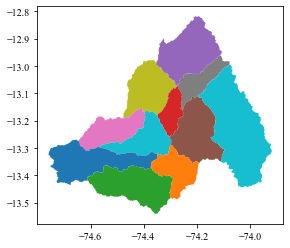

In [57]:
cachi.plot(column='Name', missing_kwds={'color': 'lightgrey'})

In [58]:
type(cachi)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Leer el vector del mapa cachi
cachi = gpd.read_file("D:/Clase R en Hdrología/Nueva carpeta/Cuenca_Cachi.geojson") #pip install pyogrio o/ fiona (shapely, gdal, fiona, pyproj, geopandas: respetar orden)
arroyos = gpd.read_file("D:/Qswat_cachi/Jonatan_tesis/Watershed/Shapes/riv1.shp")
arroyos_cg = arroyos.to_crs(epsg=4326)
cachi.head()
cachi.plot()
cachi.boundary.plot()
cachi.plot(column='Name', missing_kwds={'color': 'lightgrey'})
type(cachi)

In [59]:
# Unir mapa con varias capas

<AxesSubplot:>

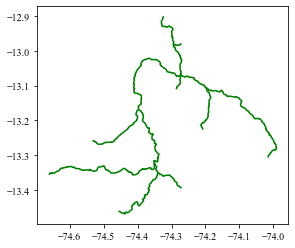

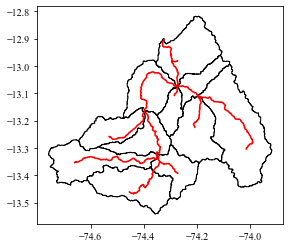

In [60]:
# Método 1
arroyos_cg.plot(marker='*', color='green', markersize=5)
arroyos_cg = arroyos_cg.to_crs(cachi.crs)
base = cachi.plot(color='white', edgecolor='black')
arroyos_cg .plot(ax=base, marker='o', color='red', markersize=5)

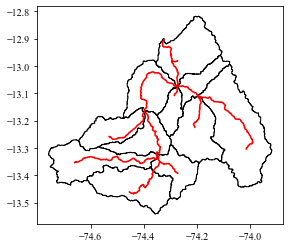

In [61]:
# Método 2
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# working with pyplot directly.
ax.set_aspect('equal')
cachi.plot(ax=ax, color='white', edgecolor='black')
arroyos_cg.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

In [62]:
#comprobar los nombres de las cuencas en busca de discrepancias con la data frame
for index, row in data.iterrows():
    if index not in cachi["Name"].to_list():
        print(index + ": is not in the list")
    else:
        pass

Yucaes: is not in the list
Chicllarazo(Aguas abajo): is not in the list


In [64]:
#Reemplazar el nombre de vectores de cachi a la data frame###Qgis
cachi.replace('Yuca', 'Yucaes', inplace = True)
cachi.replace('Chicllarazo', 'Chicllarazo(Aguas abajo)', inplace = True)
cachi

,Name,geometry
0,Pongora,"MULTIPOLYGON (((-74.11678 -12.96182, -74.11172..."
1,San Pedro de Cachi,"MULTIPOLYGON (((-74.36880 -12.97826, -74.36290..."
2,Chillico,"MULTIPOLYGON (((-74.27494 -13.07227, -74.27410..."
3,Paccha,"MULTIPOLYGON (((-74.40295 -13.15197, -74.40211..."
4,Vinchos,"MULTIPOLYGON (((-74.39027 -13.16269, -74.38943..."
5,Huatatas,"MULTIPOLYGON (((-74.19808 -13.10760, -74.19639..."
6,Apacheta,"MULTIPOLYGON (((-74.65675 -13.26985, -74.65168..."
7,Yucaes,"MULTIPOLYGON (((-74.07872 -12.99475, -74.07535..."
8,Chicllarazo(Aguas arriba),"MULTIPOLYGON (((-74.54262 -13.36310, -74.54008..."
9,Huanta,"MULTIPOLYGON (((-74.20743 -12.81824, -74.20490..."


In [66]:
#Cree una nueva columna llamada coordenadas, que se basa en la columna "geometría"
cachi['coords'] = cachi['geometry'].apply(lambda x: x.representative_point().coords[:])
cachi['coords'] = [coords[0] for coords in cachi['coords']]
cachi

,Name,geometry,coords
0,Pongora,"MULTIPOLYGON (((-74.11678 -12.96182, -74.11172...","(-74.2079332431199, -13.059909700452845)"
1,San Pedro de Cachi,"MULTIPOLYGON (((-74.36880 -12.97826, -74.36290...","(-74.3735946540266, -13.084504444581167)"
2,Chillico,"MULTIPOLYGON (((-74.27494 -13.07227, -74.27410...","(-74.29281213581889, -13.16533170525439)"
3,Paccha,"MULTIPOLYGON (((-74.40295 -13.15197, -74.40211...","(-74.51627754676431, -13.230969300922752)"
4,Vinchos,"MULTIPOLYGON (((-74.39027 -13.16269, -74.38943...","(-74.37233798473326, -13.246705562659592)"
5,Huatatas,"MULTIPOLYGON (((-74.19808 -13.10760, -74.19639...","(-74.2035859066886, -13.231209981353448)"
6,Apacheta,"MULTIPOLYGON (((-74.65675 -13.26985, -74.65168...","(-74.55572452974543, -13.353045379149012)"
7,Yucaes,"MULTIPOLYGON (((-74.07872 -12.99475, -74.07535...","(-74.04413102383214, -13.219078229602655)"
8,Chicllarazo(Aguas arriba),"MULTIPOLYGON (((-74.54262 -13.36310, -74.54008...","(-74.44022906611957, -13.4537076057114)"
9,Huanta,"MULTIPOLYGON (((-74.20743 -12.81824, -74.20490...","(-74.22515391182213, -12.946425864729955)"


In [68]:
# Fusionar los 'datos' con el geodataframe de geopandas 'cachi'
merge = cachi.join(data, on = 'Name', how = 'right')
merge

,Name,geometry,coords,PRECIP,ET,SURQ,GW,WYLD,LAT,SW,BWF,GWF,GWC
1,San Pedro de Cachi,"MULTIPOLYGON (((-74.36880 -12.97826, -74.36290...","(-74.3735946540266, -13.084504444581167)",976.457,536.076,55.200,251.198,411.054,90.051,280.531,396.449,816.607,0.673182
4,Vinchos,"MULTIPOLYGON (((-74.39027 -13.16269, -74.38943...","(-74.37233798473326, -13.246705562659592)",579.578,469.687,5.532,51.355,84.862,24.038,336.873,80.925,806.560,0.908815
0,Pongora,"MULTIPOLYGON (((-74.11678 -12.96182, -74.11172...","(-74.2079332431199, -13.059909700452845)",675.339,430.875,40.045,113.883,220.003,58.947,307.485,212.875,738.360,0.776212
7,Yucaes,"MULTIPOLYGON (((-74.07872 -12.99475, -74.07535...","(-74.04413102383214, -13.219078229602655)",1039.039,548.879,84.656,229.626,463.411,135.842,376.342,450.124,925.221,0.672719
3,Paccha,"MULTIPOLYGON (((-74.40295 -13.15197, -74.40211...","(-74.51627754676431, -13.230969300922752)",579.578,486.510,8.647,28.843,68.472,28.249,531.681,65.739,1018.191,0.939351
5,Huatatas,"MULTIPOLYGON (((-74.19808 -13.10760, -74.19639...","(-74.2035859066886, -13.231209981353448)",1039.039,552.940,74.829,333.221,491.471,64.631,353.524,472.681,906.464,0.657265
2,Chillico,"MULTIPOLYGON (((-74.27494 -13.07227, -74.27410...","(-74.29281213581889, -13.16533170525439)",579.578,463.171,5.453,57.122,91.586,24.783,251.447,87.358,714.618,0.891072
8,Chicllarazo(Aguas arriba),"MULTIPOLYGON (((-74.54262 -13.36310, -74.54008...","(-74.44022906611957, -13.4537076057114)",677.943,447.969,12.626,135.249,203.162,46.979,465.375,194.854,913.344,0.824170
6,Apacheta,"MULTIPOLYGON (((-74.65675 -13.26985, -74.65168...","(-74.55572452974543, -13.353045379149012)",701.874,534.344,14.628,68.491,144.860,57.060,437.673,140.179,972.017,0.873962
9,Huanta,"MULTIPOLYGON (((-74.20743 -12.81824, -74.20490...","(-74.22515391182213, -12.946425864729955)",976.456,532.203,78.197,211.312,415.344,113.327,313.228,402.836,845.431,0.677284


<ipython-input-69-7826e46dde2c>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')
<ipython-input-69-7826e46dde2c>:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax2.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')
<ipython-input-69-7826e46dde2c>:30: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')


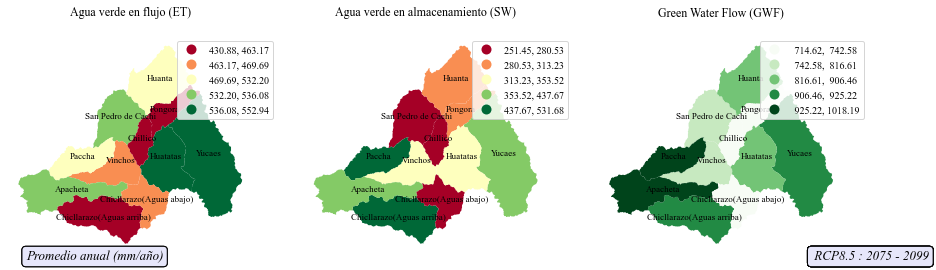

In [69]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6))

merge.plot(
    column='ET', ax=ax1, legend=True,  scheme='quantiles', cmap='RdYlGn',markersize=20,
)
merge.plot(
    column='SW', ax=ax2, legend=True, scheme='quantiles', cmap='RdYlGn',
)
merge.plot(
    column='GWF', ax=ax3, legend=True,  scheme='quantiles', cmap='Greens', #'OrRd'
)
for ax in (ax1,ax2,ax3):
    ax.axis('off')
    ax1.set_title("Agua verde en flujo (ET)\n ", size= 12)
    ax1.get_legend().set_bbox_to_anchor((1.1, 1))
    ax1.text(-74.73, -13.60, "Promedio anual (mm/año)", style="italic",
    bbox=dict(facecolor='lavender', alpha=1, boxstyle='round'), size= 13)
for idx, row in merge.iterrows():    
    ax1.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')
    ax2.set_title("Agua verde en almacenamiento (SW)\n ", size= 12)
    ax2.get_legend().set_bbox_to_anchor((1.1, 1))
for idx, row in merge.iterrows():    
    ax2.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')
    ax3.set_title("Green Water Flow (GWF)\n", size= 12)
    ax3.get_legend().set_bbox_to_anchor((1.1, 1))
    ax3.text(-74.00, -13.60, " RCP8.5 : 2075 - 2099", style="italic",
    bbox=dict(facecolor='lavender', alpha=1, boxstyle='round'), size= 13)

for idx, row in merge.iterrows():    
    ax3.annotate(s=row['Name'], xy=row['coords'], fontsize=9, horizontalalignment='center')
    
plt.show()

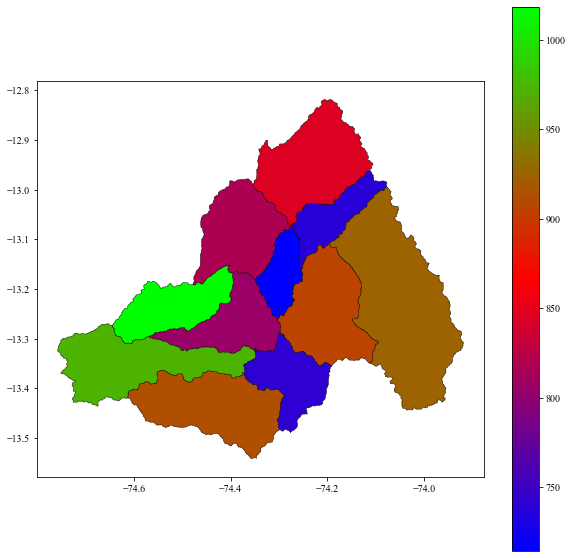

In [71]:
ax = merge.plot(column = "GWF",
                cmap = "brg", #color= OrRd
                figsize = (10,10),
                legend = True,
                edgecolor = "black",
                linewidth = 0.4)

<ipython-input-76-110f496032d8>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['Name'], xy=row['coords'], fontsize=10, horizontalalignment='center')


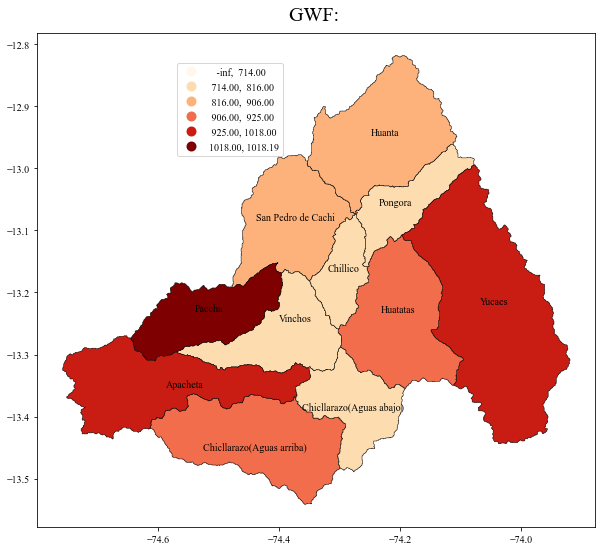

In [76]:
ax = merge.plot(column = "GWF",
                cmap = "OrRd", #color= OrRd
                figsize = (10,10),
                legend = True,
                scheme = 'user_defined', 
                classification_kwds = {'bins':[714, 816, 906, 925, 1018]}, #conda install -c conda-forge mapclassify
                edgecolor = "black",
                linewidth = 0.5)
# Agrear titulo a la mapa 
ax.set_title('GWF: ', fontdict = 
             {'fontsize':20}, pad = 12.5)

# Agregar nombres
for idx, row in merge.iterrows():    
    plt.annotate(s=row['Name'], xy=row['coords'], fontsize=10, horizontalalignment='center')
# Retirar los ejes
#ax.set_axis_off()
    
# Mover la leyenda
ax.get_legend().set_bbox_to_anchor((0.45, 0.95))

In [ ]:
merge.columns
type(merge)
type(merge.columns)
merge.columns.to_list()
merge.columns.to_list()[2]#columna 2
len(merge.columns.to_list())#numero de valores
merge.columns.to_list()[2:8]

In [77]:
merge.columns

Index(['Name', 'geometry', 'coords', 'PRECIP', 'ET', 'SURQ', 'GW', 'WYLD',
       'LAT', 'SW', 'BWF', 'GWF', 'GWC'],
      dtype='object')

In [78]:
type(merge)

geopandas.geodataframe.GeoDataFrame

In [79]:
type(merge.columns)

pandas.core.indexes.base.Index

In [80]:
merge.columns.to_list()

['Name',
 'geometry',
 'coords',
 'PRECIP',
 'ET',
 'SURQ',
 'GW',
 'WYLD',
 'LAT',
 'SW',
 'BWF',
 'GWF',
 'GWC']

In [81]:
merge.columns.to_list()[3]#columna 3

'PRECIP'

In [82]:
len(merge.columns.to_list())#numero de valores

13

In [83]:
merge.columns.to_list()[3:13]

['PRECIP', 'ET', 'SURQ', 'GW', 'WYLD', 'LAT', 'SW', 'BWF', 'GWF', 'GWC']

In [101]:
image_frames = []
#crear  graficos de la columna [3:13]
for dates in merge.columns.to_list()[3:13]:
    print(dates)

PRECIP
ET
SURQ
GW
WYLD
LAT
SW
BWF
GWF
GWC


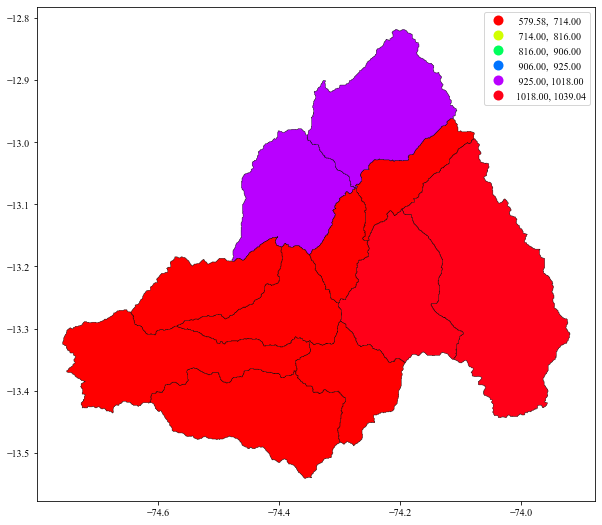

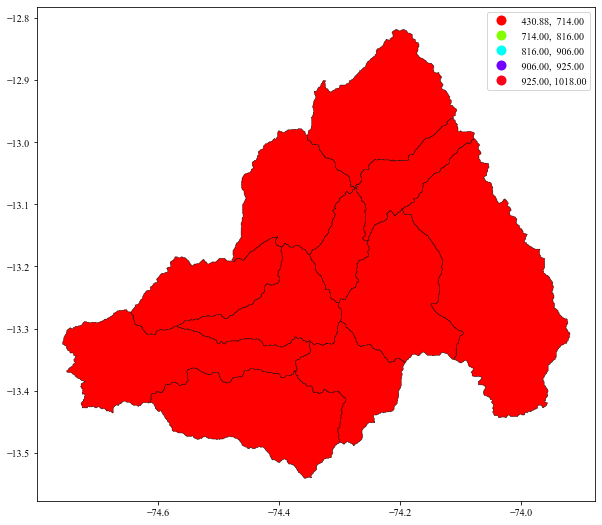

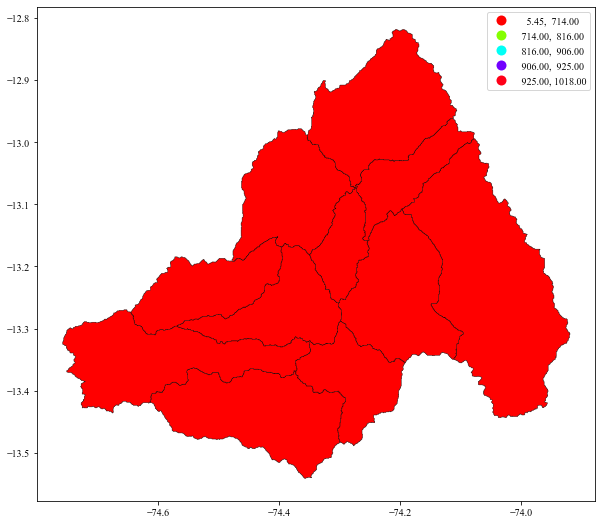

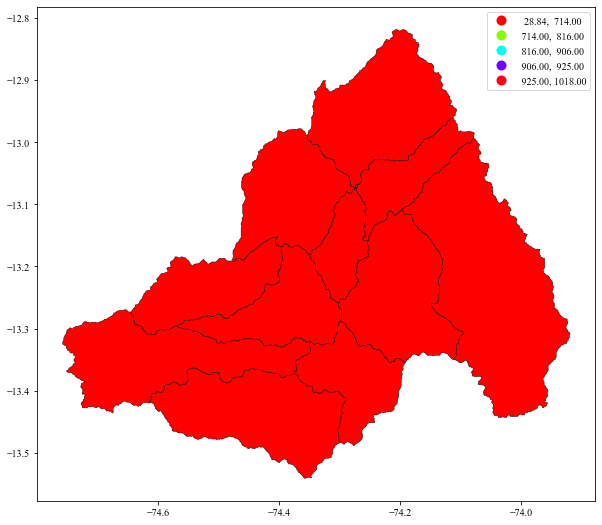

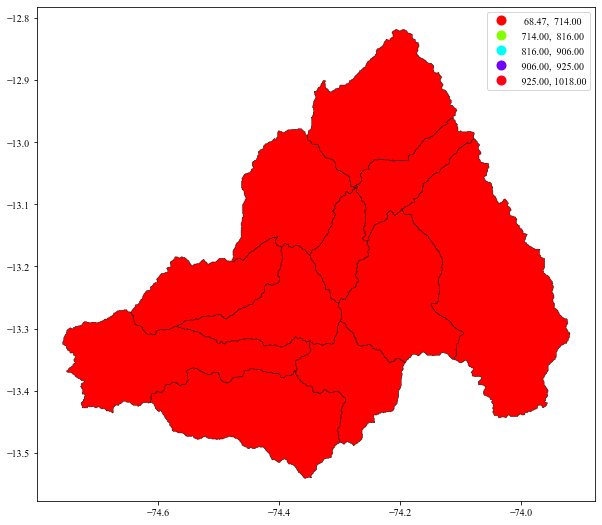

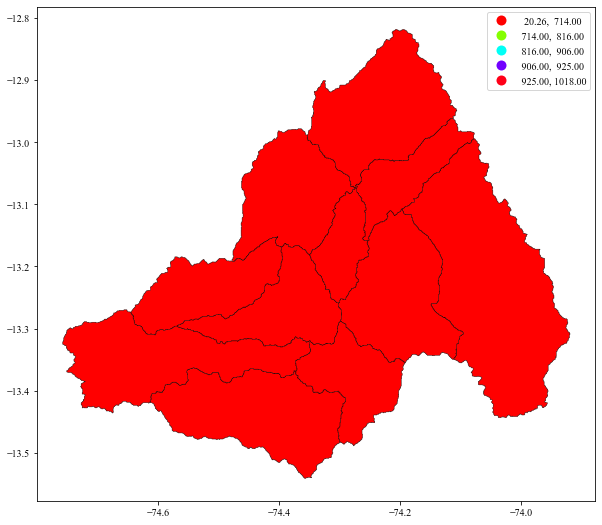

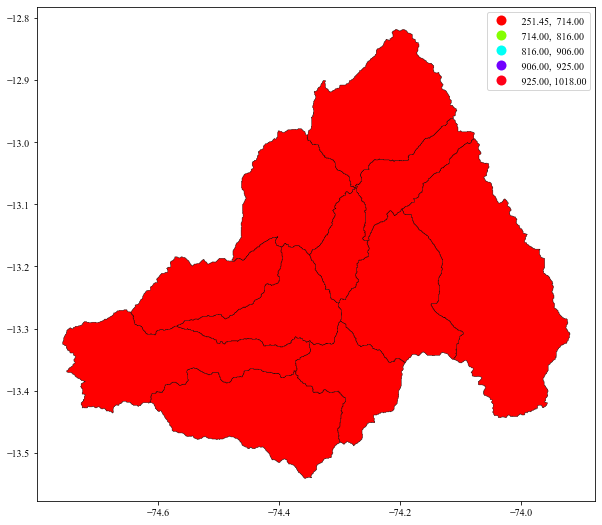

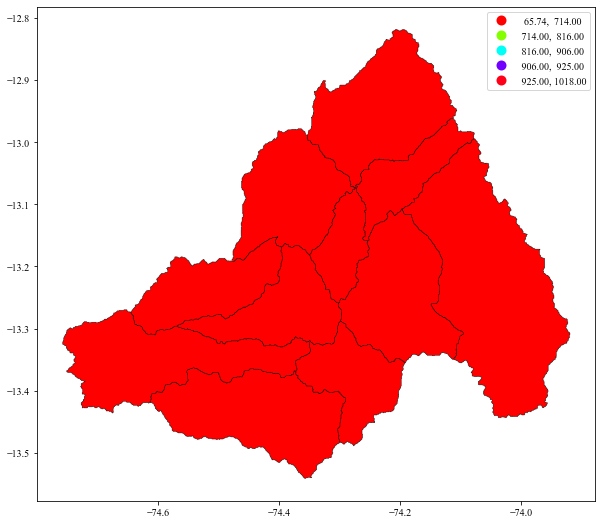

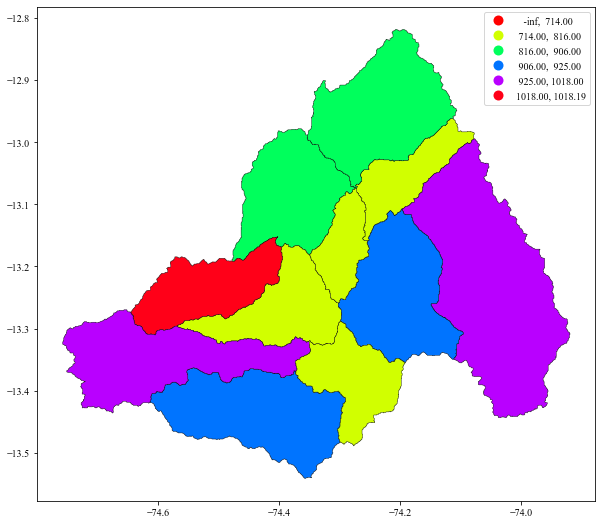

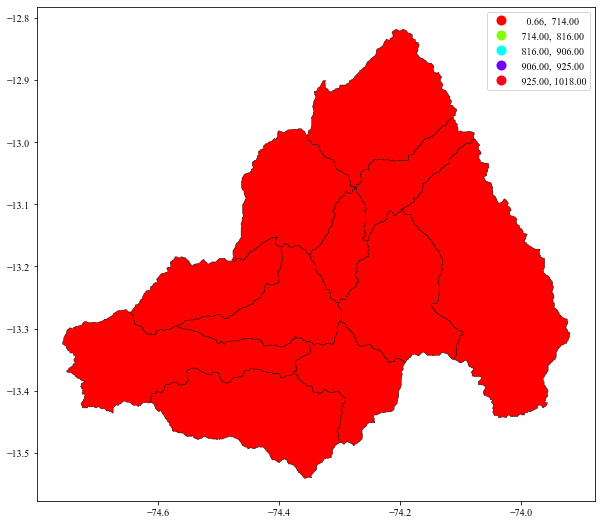

In [92]:
for dates in merge.columns.to_list()[3:13]:
  
    # Frafica 
    ax = merge.plot(column = dates, 
                    cmap = 'hsv', 
                    figsize = (10,10), 
                    legend = True,
                    scheme = 'user_defined', 
                    classification_kwds = dict(bins=[714, 816, 906, 925, 1018]), 
                    edgecolor = 'black',
                    linewidth = 0.4)

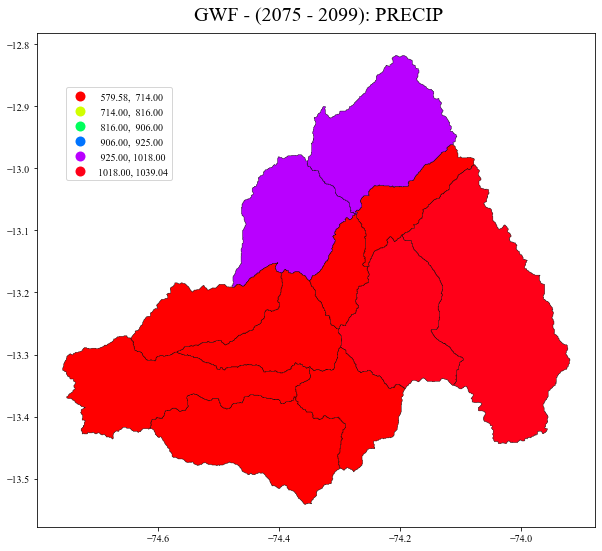

In [99]:
image_frames[0]

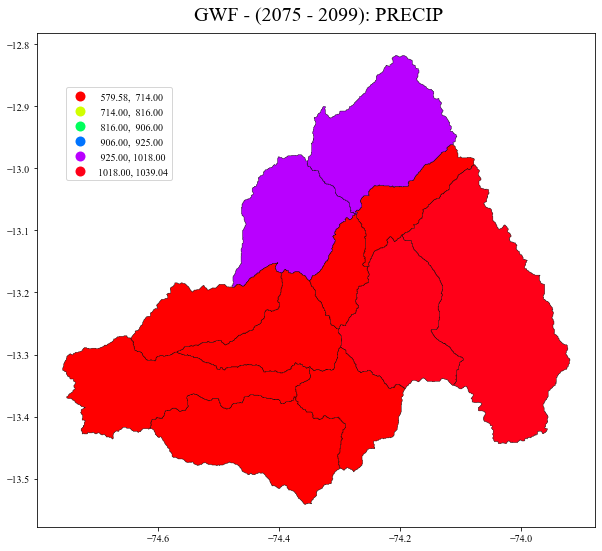

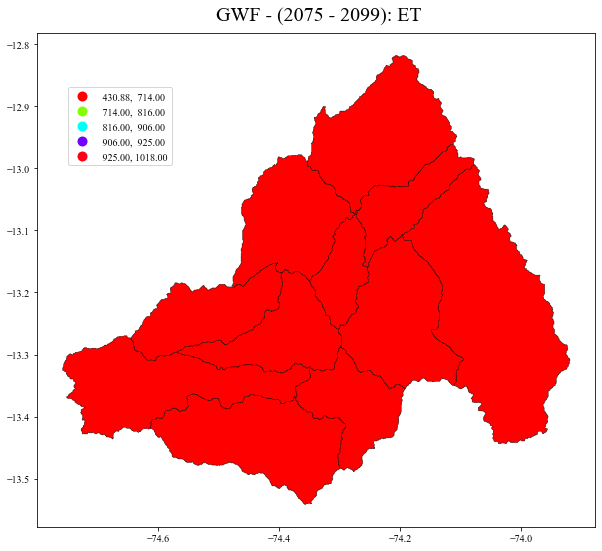

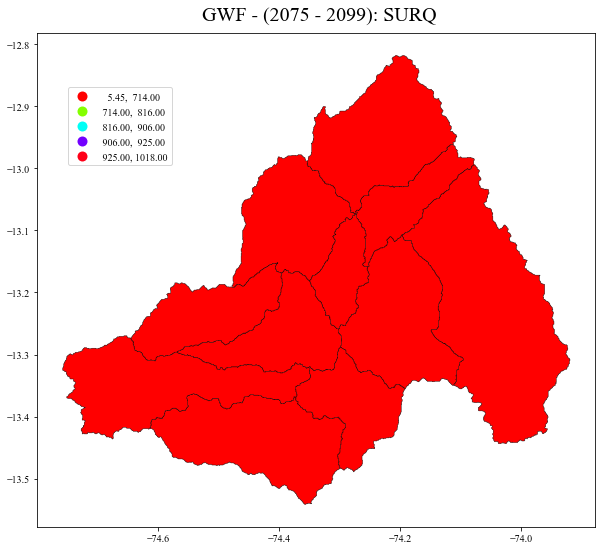

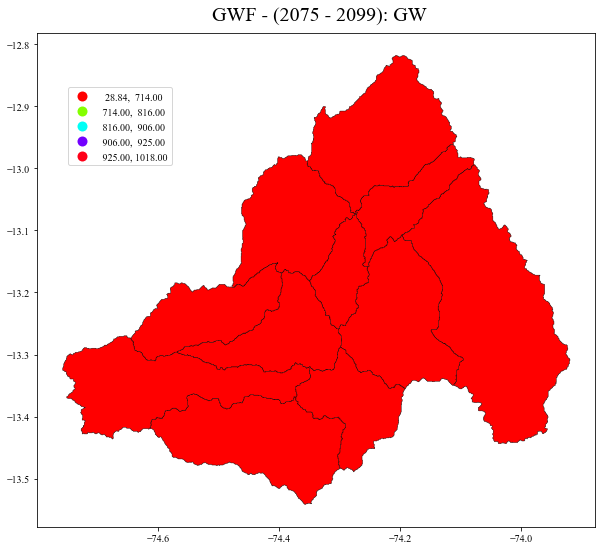

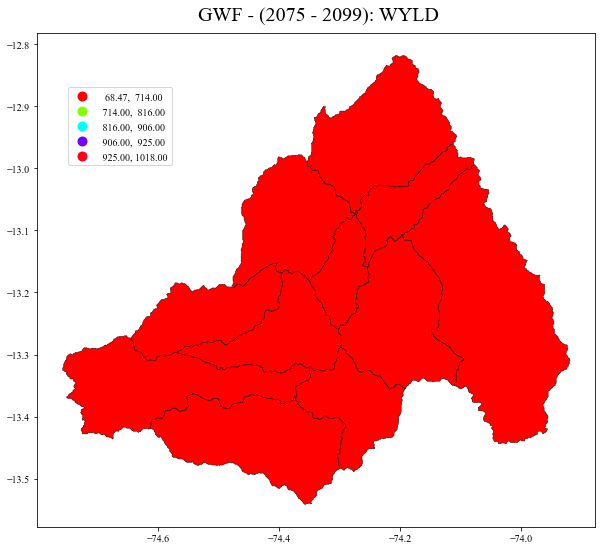

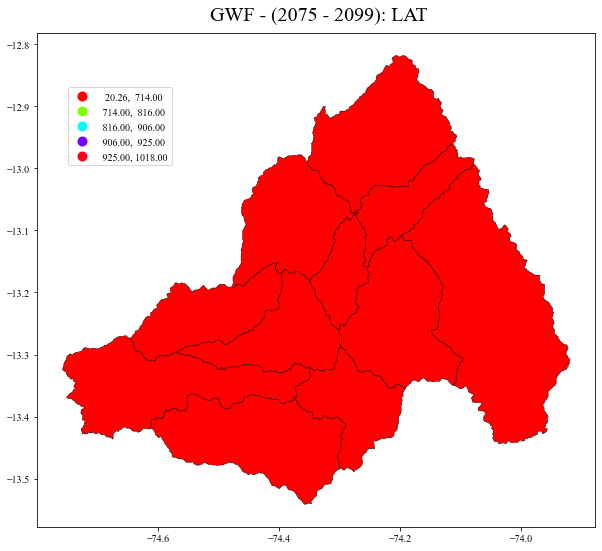

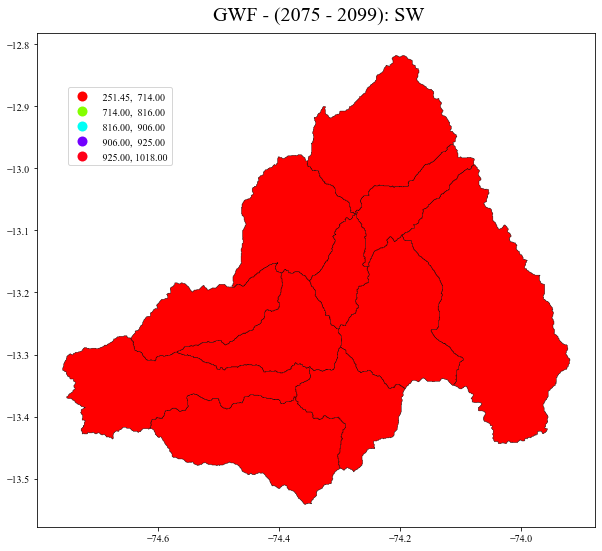

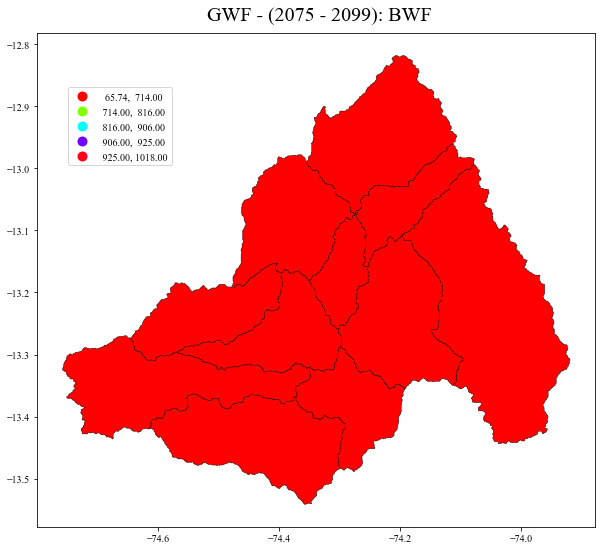

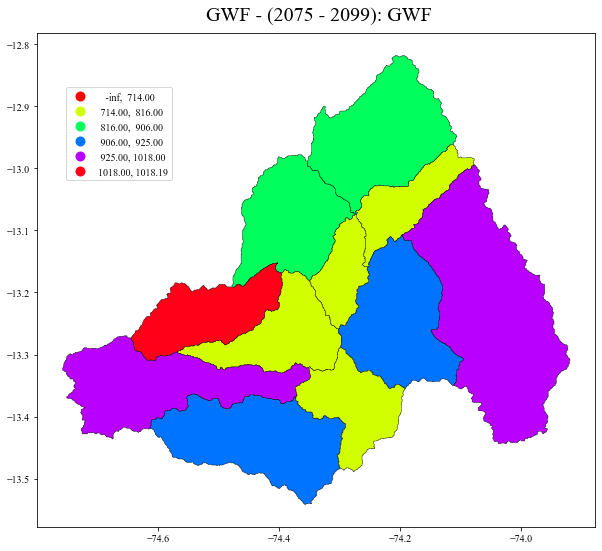

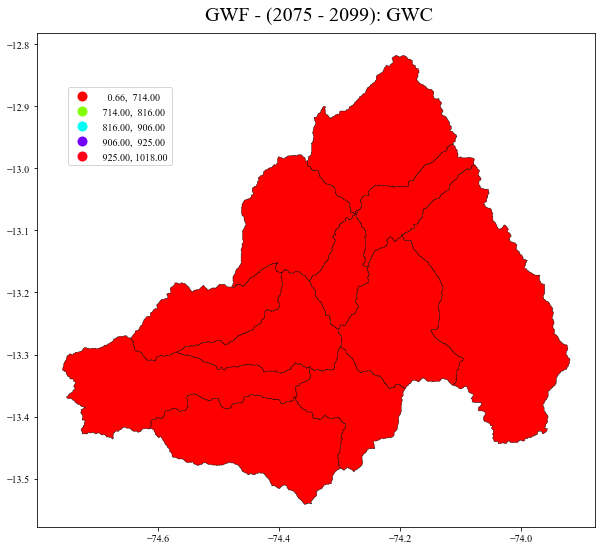

In [104]:
for dates in merge.columns.to_list()[3:13]:
  
    # Frafica 
    ax = merge.plot(column = dates, 
                    cmap = 'hsv', 
                    figsize = (10,10), 
                    legend = True,
                    scheme = 'user_defined', 
                    classification_kwds = dict(bins=[714, 816, 906, 925, 1018]), 
                    edgecolor = 'black',
                    linewidth = 0.4)
    
    # Agrear titulo a la mapa 
    ax.set_title(' GWF - (2075 - 2099): '+ dates, fontdict = 
                 {'fontsize':20}, pad = 12.5)
    #ax.text(-74.46, -13.56, "Agua azul multianual(mm/Año)", style="italic",bbox=dict(facecolor='wheat', alpha=1, boxstyle='round'))
    # Retirar los ejes
    #ax.set_axis_off()
    
    # Mover la leyenda
    ax.get_legend().set_bbox_to_anchor((0.25, 0.9))
    
    #Crear magenes con PIL
    img = ax.get_figure()
    type(img)
    
    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))# tomar lista vacios
    #image_frames[0]#imagen 0
# Crear un GIF animado
image_frames[0].save('D:/Qswat_cachi/Jonatan_tesis/anim(2075 - 2099).gif', format = 'GIF',
            append_images = image_frames[1:], 
            save_all = True, duration = 300, 
            loop = 3) #Repeticiones

f.close()